## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import glob
import cv2
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import *

## Loading Image Files from Dataset Directory

In [2]:
# Loading imgs 
imgs=glob.glob('/kaggle/input/english-handwritten-characters-dataset/Img/*')

# Loading csv file
df = pd.read_csv("/kaggle/input/english-handwritten-characters-dataset/english.csv")
df.head(6)

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
5,Img/img001-006.png,0


## Data Preparation and Preprocessing for Image Classification Model

In [3]:
new_imgs = sorted(imgs)

labels = df['label'].tolist()

new_data = []
for i in new_imgs:
    img = cv2.imread(i, 1)
    img = cv2.resize(img, (64, 64))
    new_data.append(img)
new_data = np.array(new_data)

labels = np.array(labels)

Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

train_images, test_images, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

train_images = train_images / 255.0
test_images = test_images / 255.0

## Building Model

In [4]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=25,validation_split = 0.2)

Epoch 1/25


I0000 00:00:1726335171.531132      66 service.cc:145] XLA service 0x7d38380035b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726335171.531190      66 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 7/69 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0108 - loss: 4.3793

I0000 00:00:1726335176.309201      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.0116 - loss: 4.2553 - val_accuracy: 0.0275 - val_loss: 4.0570
Epoch 2/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0797 - loss: 3.8151 - val_accuracy: 0.1374 - val_loss: 3.2607
Epoch 3/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1894 - loss: 3.0356 - val_accuracy: 0.2125 - val_loss: 2.9044
Epoch 4/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2804 - loss: 2.6181 - val_accuracy: 0.3443 - val_loss: 2.4207
Epoch 5/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4324 - loss: 2.0218 - val_accuracy: 0.4487 - val_loss: 1.9973
Epoch 6/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5844 - loss: 1.4692 - val_accuracy: 0.5275 - val_loss: 1.6957
Epoch 7/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7411 - loss: 1.0159 - val_accuracy: 0.5971 - val_loss: 1.4876
Epoch 8/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7815 - loss: 0.7482 - val_accuracy: 0.6209 - val_loss: 1

## Evaluate Model

In [5]:
model.evaluate(test_images,test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6575 - loss: 1.4587


[1.30936861038208, 0.6935483813285828]

## Make Predictions

In [6]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Accuracy: 0.6935483870967742
Precision: 0.7350497111523712
Recall: 0.6935483870967742
F1 Score: 0.6927131887252547
Confusion Matrix:
[[ 4  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  1  6  0]
 [ 0  0  0 ...  0  0 10]]


## Visualisation

In [7]:
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7350497111523712
Recall: 0.6935483870967742


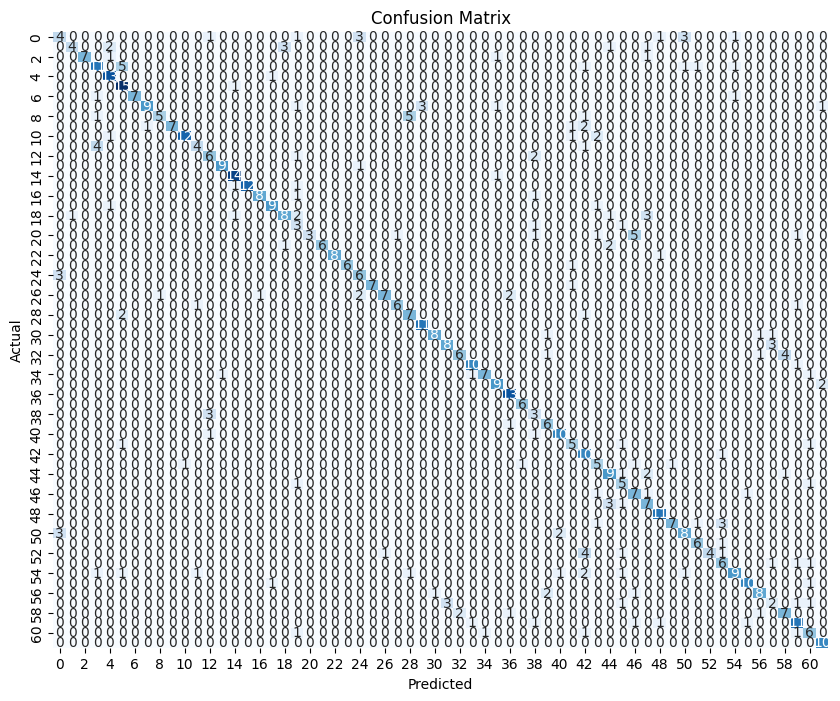

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


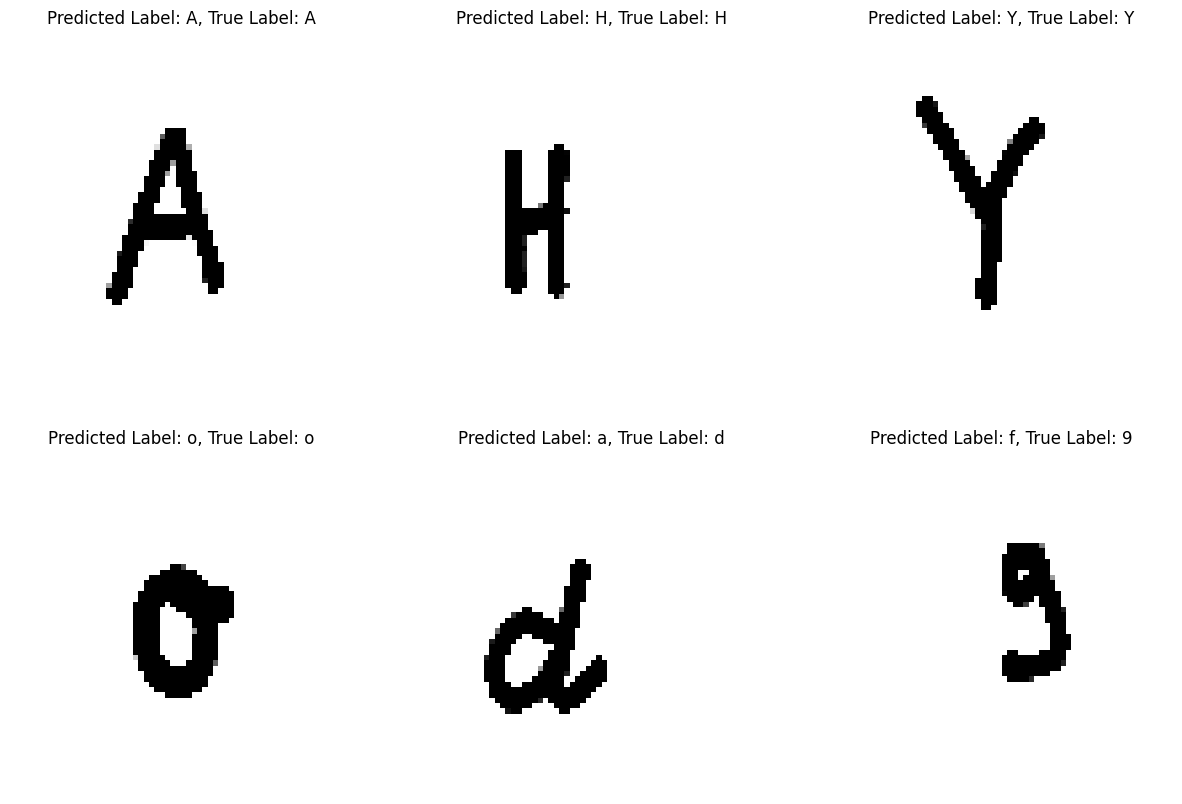

In [9]:
import random

random_indices = random.sample(range(len(test_images)), 6)

y_pred_probs = model.predict(test_images[random_indices])

y_pred_labels = np.argmax(y_pred_probs, axis=1)

y_pred_labels_decoded = Encoder.inverse_transform(y_pred_labels)

y_true_labels_decoded = Encoder.inverse_transform(test_labels[random_indices])

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[idx])
    plt.title(f'Predicted Label: {y_pred_labels_decoded[i]}, True Label: {y_true_labels_decoded[i]}')
    plt.axis('off')
plt.show()